### Import required libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Data from a CSV File

In [24]:
df=pd.read_csv("Nykaa.csv")
df.head()

,Brand_name,Price,Discount_item_clean,Discounted_Price_clean,Ratings_clean,Shades_clean
0,Charlotte Tilbury,NaN,NaN,3450,4719.0,19.0
1,Nykaa Matte,675.0,35.0,439,77832.0,24.0
2,M.A.C MACximal,NaN,NaN,2550,10431.0,27.0
3,Maybelline New,849.0,37.0,535,38113.0,16.0
4,Lakme Xtraordin,990.0,30.0,693,9752.0,23.0


### Assigning Appropriate Column Names to Features

In [25]:
col=["Brand_name","Price","Discount","Discounted_price","Customer_ratings","shades_option"]
df.columns=col

### check the shape of the data

In [26]:
df.shape

(1980, 6)

### check the information about the data

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1980 entries, 0 to 1979
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand_name        1893 non-null   object 
 1   Price             1428 non-null   float64
 2   Discount          1427 non-null   float64
 3   Discounted_price  1980 non-null   int64  
 4   Customer_ratings  1784 non-null   float64
 5   shades_option     1352 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 92.9+ KB


### check duplicates

In [14]:
df.duplicated().sum()

109

### Drop duplicates

In [29]:
df.drop_duplicates(inplace=True)

### Checking duplicates after dropping 

In [30]:
df.duplicated().sum()

0

### Check null values

In [17]:
df.isnull().sum()

Brand_name           87
Price               552
Discount            553
Discounted_price      0
Customer_ratings    196
shades_option       628
dtype: int64

### Dealing with missing values

In [49]:
df["Brand_name"]=df["Brand_name"].fillna(0)
df["Customer_ratings"]=df["Customer_ratings"].fillna(0)
df["shades_option"]=df["shades_option"].fillna(0)
df["Customer_ratings"]=df["Customer_ratings"].astype(int)
df["shades_option"]=df["shades_option"].astype(int)
df["Price"]=df["Price"].fillna(df["Price"].median())
df["Discount"]=df["Discount"].fillna(10)

### Removing unwanted characters from Price 

In [46]:
df['Price'] = df['Price'].str.replace('₹', '', regex=False)  # remove ₹
df['Price'] = df['Price'].str.replace(',', '', regex=False)  # remove commas if any
df['Price'] = df['Price'].astype(int)

### Filtering Out Rows with Invalid Brand Names

In [51]:
df=df[df["Brand_name"]!=0]

In [23]:
df.isna().sum()

Brand_name          0
Price               0
Discount            0
Discounted_price    0
Customer_ratings    0
shades_option       0
dtype: int64

### Unique values

In [24]:
df.nunique()

Brand_name          605
Price               261
Discount             56
Discounted_price    624
Customer_ratings    796
shades_option        39
dtype: int64

### Overview of Data Summary Statistics

In [26]:
df.describe()

,Price,Discount,Discounted_price,Customer_ratings,shades_option
count,1787.000000,1787.000000,1787.000000,1787.000000,1787.000000
mean,770.256855,18.202015,949.967543,4934.608282,5.969222
std,580.954586,11.510647,963.975056,20757.719490,7.016031
min,65.000000,2.000000,55.000000,0.000000,0.000000
25%,499.000000,10.000000,356.000000,9.000000,0.000000
50%,650.000000,15.000000,599.000000,83.000000,4.000000
75%,800.000000,25.000000,999.000000,757.000000,9.000000
max,6040.000000,70.000000,7900.000000,264681.000000,56.000000


### Correlation

In [53]:
df.corr(numeric_only = True)

,Price,Discount,Discounted_price,Customer_ratings,shades_option
Price,1.000000,0.136882,0.386324,0.006228,-0.181484
Discount,0.136882,1.000000,-0.284757,0.054471,-0.019515
Discounted_price,0.386324,-0.284757,1.000000,-0.071094,-0.075024
Customer_ratings,0.006228,0.054471,-0.071094,1.000000,0.054684
shades_option,-0.181484,-0.019515,-0.075024,0.054684,1.000000


# EDA

## Univarient Analysis

### Numerical features

**Price:** The average price is ₹770.26, with high variability (std = ₹580.95) and a positive skew (4.02), indicating a higher frequency of lower-priced items.

**Discount:** The mean discount is 18.20%, with a moderate spread (std = 11.51) and a positive skew (1.48), suggesting most products have lower discounts but a few offer significantly higher discounts.

**Discounted Price:** The average discounted price is ₹949.97, but the high standard deviation (₹963.98) and positive skew (2.04) show large variation in post-discount prices.

**Customer Ratings:** With a mean of 4934.61 and a large standard deviation (20757.72), the ratings are highly skewed (6.60), indicating that most products have low ratings with a few having exceptionally high ratings.

**Shades Option:** The average number of shades offered is 5.97, with moderate variability (std = 7.02) and a positive skew (1.77), reflecting a tendency for products to offer fewer shade options, but some offer significantly more.

In [31]:
for i in df.select_dtypes(include='number'):
    print(i,df[i].agg(["mean",'std','skew',"median"]))

Price mean      770.256855
std       580.954586
skew        4.019631
median    650.000000
Name: Price, dtype: float64
Discount mean      18.202015
std       11.510647
skew       1.477922
median    15.000000
Name: Discount, dtype: float64
Discounted_price mean      949.967543
std       963.975056
skew        2.038974
median    599.000000
Name: Discounted_price, dtype: float64
Customer_ratings mean       4934.608282
std       20757.719490
skew          6.604334
median       83.000000
Name: Customer_ratings, dtype: float64
shades_option mean      5.969222
std       7.016031
skew      1.765097
median    4.000000
Name: shades_option, dtype: float64


### Histogram
**Price:** The histogram likely shows a higher frequency of lower-priced items, with a few outliers at higher price points, as indicated by the positive skew (4.02) and high variability (std = ₹580.95).

**Discount:** The histogram is expected to show most products with lower discounts, with a few products offering significantly higher discounts, supported by the positive skew (1.48) and moderate standard deviation (11.51).

**Discounted Price:** The histogram likely exhibits a wide range of discounted prices, with many products having lower post-discount prices, while a few products have much higher prices, as reflected by the positive skew (2.04) and large standard deviation (₹963.98).

**Customer Ratings:** The histogram is expected to be highly right-skewed, with most products having low ratings and a few having exceptionally high ratings, indicated by the positive skew (6.60) and large standard deviation (20757.72).

**Shades Option:** The histogram likely shows a concentration of products offering fewer shade options, with a few products offering significantly more, as suggested by the positive skew (1.77) and standard deviation (7.02).

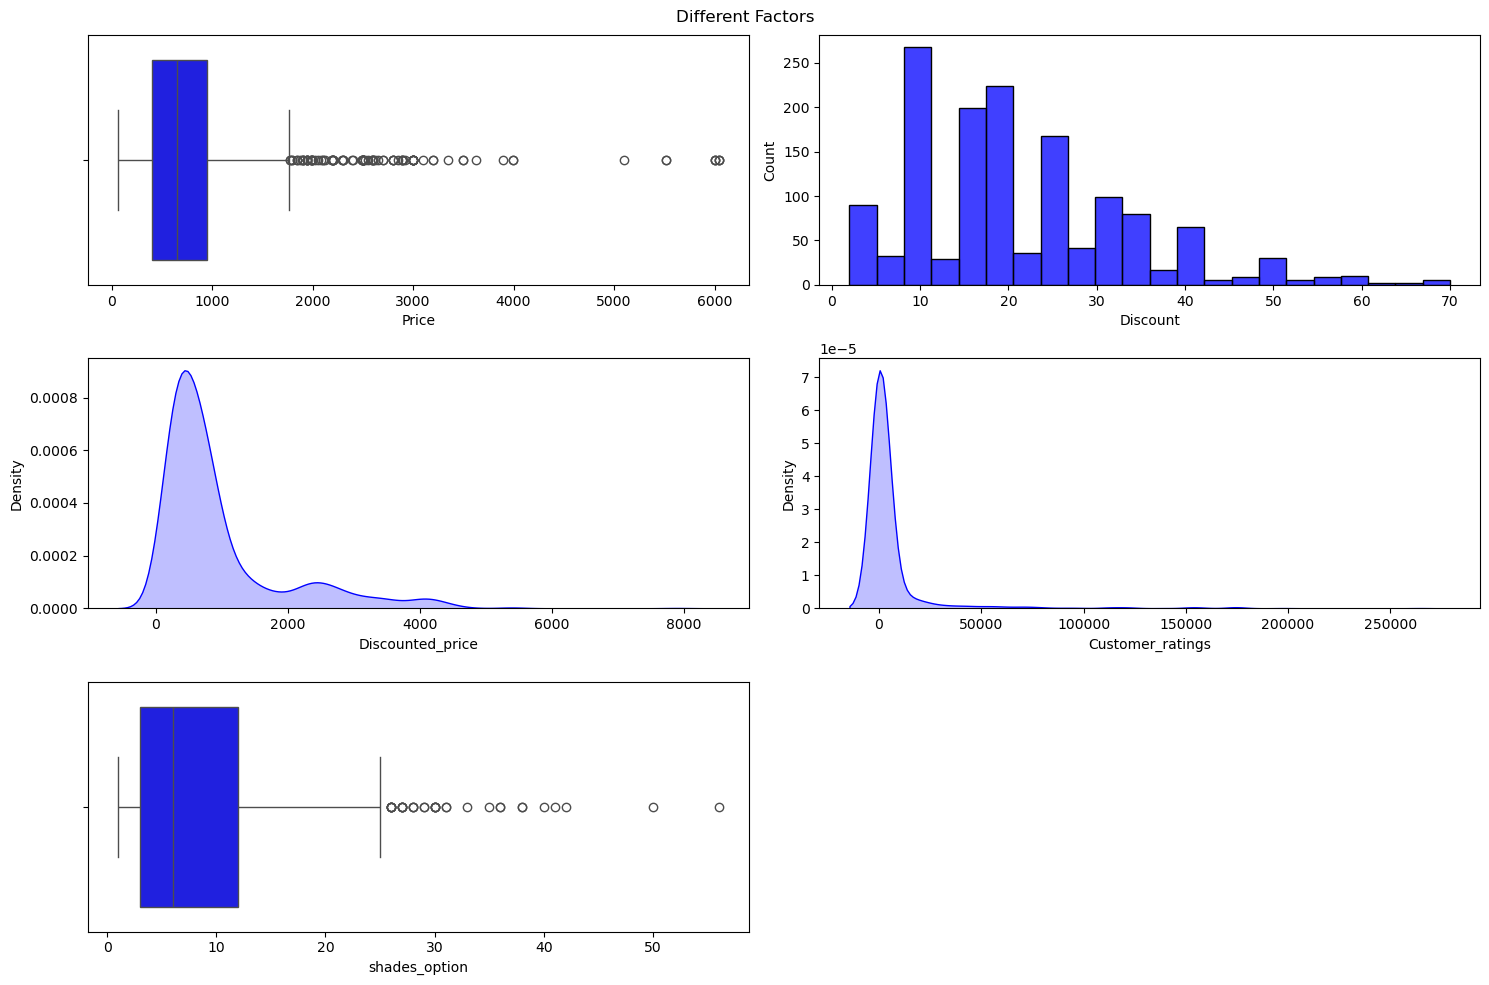

In [19]:
plt.figure(figsize=(15,10))
plt.suptitle("Different Factors")

#---With outliers---
#Box plot
plt.subplot(3,2,1)
sns.boxplot(data=df, x = "Price",color = "blue")
#2. Histogram 
plt.subplot(3,2,2) 
sns.histplot(data=df, x ="Discount",color = "blue")
#3. KDE plot 
plt.subplot(3,2,3)
sns.kdeplot(data=df, x = "Discounted_price", fill=True,color = "blue") 
plt.subplot(3,2,4)
sns.kdeplot(data=df,x="Customer_ratings",fill=True,color = "blue")
plt.subplot(3,2,5)
sns.boxplot(data=df,x="shades_option",color = "blue")

### Boxplot
**Price:** The box plot will likely show a wide interquartile range (IQR), indicating high variability in prices. The positive skew (4.02) suggests the presence of a few higher-priced outliers above the upper quartile.

**Discount:** The box plot will show a moderate IQR, with most discounts clustered toward the lower end. The positive skew (1.48) suggests a few outliers with significantly higher discounts above the upper quartile.

**Discounted Price:** The box plot will likely display a large IQR, reflecting the significant variation in discounted prices. The positive skew (2.04) suggests a few high-value outliers above the upper quartile.

**Customer Ratings:** The box plot will show a high degree of skewness, with most products having low ratings clustered at the lower end and a few extreme outliers with very high ratings, as indicated by the positive skew (6.60).

**Shades Option:** The box plot will likely show a moderate IQR, with most products offering fewer shades. The positive skew (1.77) suggests a few outliers offering a higher number of shades above the upper quartile.

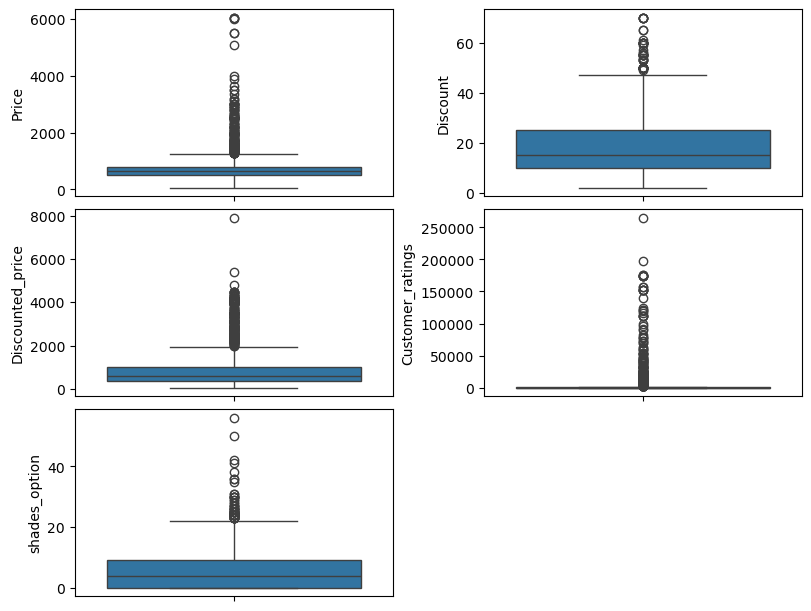

In [33]:
plt.figure(figsize=(8,6),layout="constrained")
plt.subplot(3,2,1)
sns.boxplot(df["Price"])
plt.subplot(3,2,2)
sns.boxplot(df["Discount"])
plt.subplot(3,2,3)
sns.boxplot(df["Discounted_price"])
plt.subplot(3,2,4)
sns.boxplot(df["Customer_ratings"])
plt.subplot(3,2,5)
sns.boxplot(df["shades_option"])
plt.savefig("boxplot_univariate.jpg")
plt.show()

#### Dealing with outliers

In [24]:
for i in df.columns[2:]:
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1
    print("iqr is :", IQR)
    L=Q1-(1.5*IQR)
    U=Q3+(1.5*IQR)
    print(i,"with outliers:",len(df[(df[i]<L) | (df[i]>U)]))
    df.loc[(df[i] < L) | (df[i] > U), i] = df[i].median()
 #df.loc[(df[(df[i]<L) | (df[i]>U)])]=df[i].median()
    print(i,"after removing outliers:",len(df[(df[i]<L) | (df[i]>U)]))

iqr is : 17.5
Discount with outliers: 29
Discount after removing outliers: 0
iqr is : 650.0
Discounted_price with outliers: 279
Discounted_price after removing outliers: 0
iqr is : 1036.25
Customer_ratings with outliers: 306
Customer_ratings after removing outliers: 0
iqr is : 9.0
shades_option with outliers: 34
shades_option after removing outliers: 0


#### Boxplot after Dealing with outliers

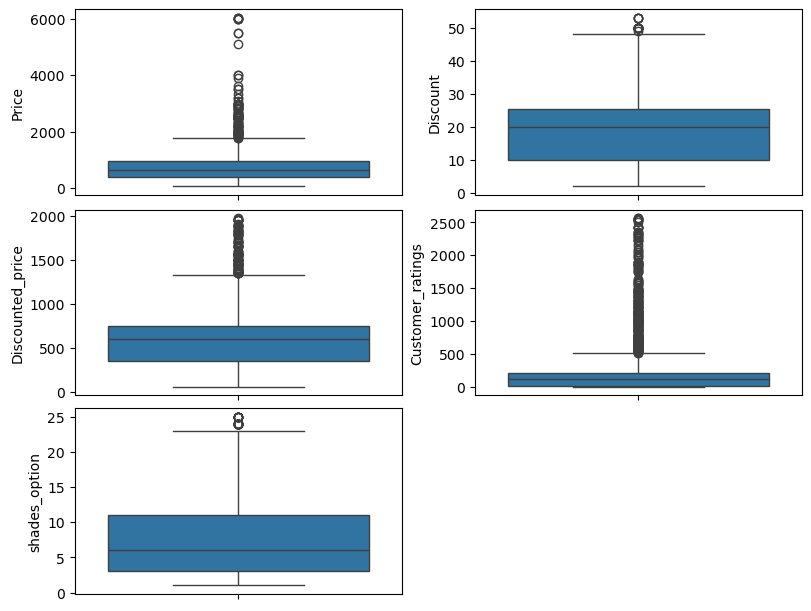

In [25]:
plt.figure(figsize=(8,6),layout="constrained")
plt.subplot(3,2,1)
sns.boxplot(df["Price"])
plt.subplot(3,2,2)
sns.boxplot(df["Discount"])
plt.subplot(3,2,3)
sns.boxplot(df["Discounted_price"])
plt.subplot(3,2,4)
sns.boxplot(df["Customer_ratings"])
plt.subplot(3,2,5)
sns.boxplot(df["shades_option"])
plt.savefig("boxplot_univariate_after.jpg")
plt.show()

### Brand
**Leading Brands:**
Love Earth tops the chart with the highest number of products, establishing itself as the most prominent brand. Miss Claire and Swiss Beauty closely trail, securing strong positions among the top three.

**Mid-Tier Contenders:**
Makeup Revolution and Renee Cosmetics maintain a solid presence, though slightly behind the top performers.

**Completing the Top 10:**
Maybelline New York, Blue Heaven, Insight Cosmetics, Just Herbs, and Faces Canada round out the top ten with competitive product counts.

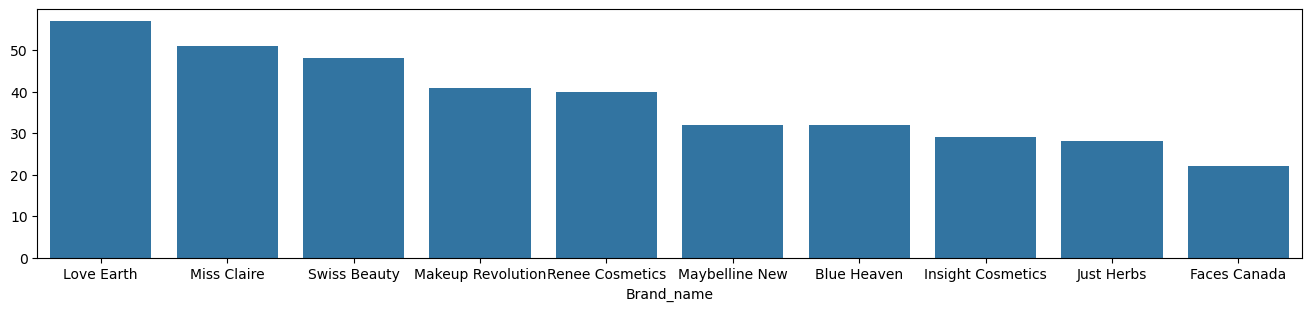

In [38]:
plt.figure(figsize=(13,3),layout="constrained")
sns.barplot(x=df["Brand_name"].value_counts().head(10).index,y=df["Brand_name"].value_counts().head(10).values)
plt.savefig("barplot_univariate.jpg")
plt.show()

# Bivariate Analysis

## numerical v/s numerical

#### Scatter Plot 
1. Price vs Discount
Products with lower price usually get small to medium discounts
Higher priced products sometimes get bigger discounts 

2. Price vs Customer ratings
Lower-priced lipsticks receive the most customer attention
Expensive products usually get lower customer ratings

3. Price vs Shade Options
Most lipsticks with more shade options are at a lower price
Expensive lipsticks have fewer shades


4. Discount vs Discounted Price
High discounts are mostly seen in products priced under 2000 after discount
Very expensive lipsticks don’t usually come with heavy discounts


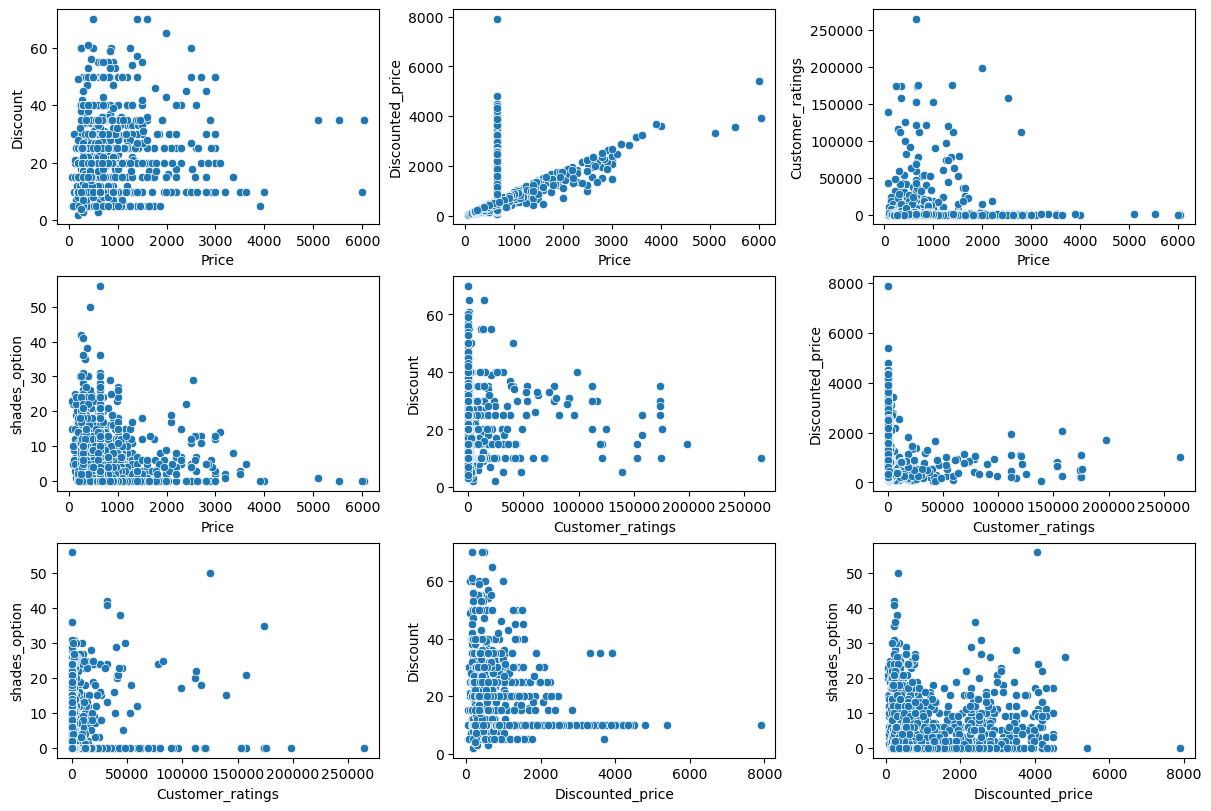

In [40]:
plt.figure(figsize=(12,8),layout="constrained")
plt.subplot(3,3,1)
sns.scatterplot(data=df,x="Price",y="Discount")
plt.subplot(3,3,2)
sns.scatterplot(data=df,x="Price",y="Discounted_price")
plt.subplot(3,3,3)
sns.scatterplot(data=df,x="Price",y="Customer_ratings")
plt.subplot(3,3,4)
sns.scatterplot(data=df,x="Price",y="shades_option")
plt.subplot(3,3,5)
sns.scatterplot(data=df,x="Customer_ratings",y="Discount")
plt.subplot(3,3,6)
sns.scatterplot(data=df,x="Customer_ratings",y="Discounted_price")
plt.subplot(3,3,7)
sns.scatterplot(data=df,x="Customer_ratings",y="shades_option")
plt.subplot(3,3,8)
sns.scatterplot(data=df,x="Discounted_price",y="Discount")
plt.subplot(3,3,9)
sns.scatterplot(data=df,x="Discounted_price",y="shades_option")
plt.savefig("scatterplot_bivariate.jpg")
# plt.subplot(3,3,10)
# sns.scatterplot(data=df,x="Discount",y="shades_option")

plt.show()
#sns.scatterplot(data=df,x="Price",y="Discount")

## numerical v/s Categorical

#### Brand vs Price
- Iba Must and Inglot HD are positioned at the higher end with prices slightly above ₹6000, indicating a premium pricing strategy.
- Another Iba Must variant is available at ₹5516, offering a more affordable alternative within the same brand.
= Guess Seductive is moderately priced at ₹5100, while Shopaarel Mix stands out as the most budget-friendly option at ₹3999.
- The price variation suggests tiered offerings catering to both premium and cost-conscious consumers.

In [8]:
brand=df.groupby("Brand_name")["Price"].max()
brand.sort_values(ascending=False).head()

Brand_name
Iba Must           6040.0
Inglot HD          6000.0
IBA Must           5516.0
Guess Seductive    5100.0
Shopaarel Mix      3999.0
Name: Price, dtype: float64

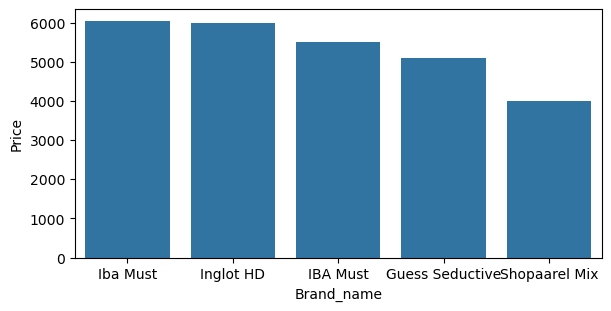

In [10]:
plt.figure(figsize=(6,3),layout="constrained")
sns.barplot(x=brand.sort_values(ascending=False).head().index,y=brand.sort_values(ascending=False).head())
plt.savefig("barplot_bivariate.jpg")
plt.show()

#### Brand vs Discounted price
- Fran Wilson offers the most budget-friendly option at ₹7900, significantly undercutting premium brands.
Inglot HD follows at ₹5400, positioning itself as a mid-range choice.
- DIOR products, including Rouge, Addict, and Rogue, cluster around ₹4500–₹4800, reflecting consistent premium pricing despite variant differences.

In [45]:
brand=df.groupby("Brand_name")["Discounted_price"].max()
brand.sort_values(ascending=False).head()

Brand_name
Fran Wilson    7900
Inglot HD      5400
DIOR Rouge     4800
DIOR Addict    4500
DIOR Rogue     4500
Name: Discounted_price, dtype: int64

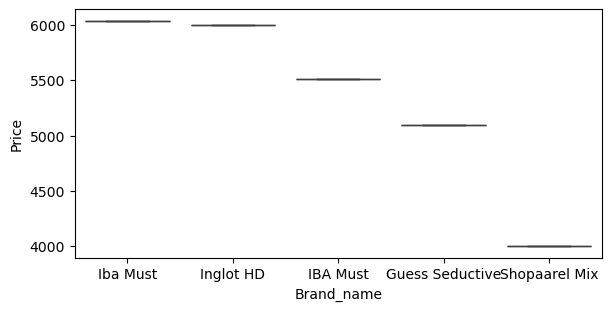

In [9]:
plt.figure(figsize=(6,3),layout="constrained")

sns.boxplot(x=brand.sort_values(ascending=False).head().index,y=brand.sort_values(ascending=False).head())
plt.savefig("boxplot_dp_multi.jpg")
plt.show()

#### Brand vs Shades
- Givenchy Le leads with over 55 shades, followed closely by Lakme Forever's 50, while Swiss Beauty and Miss Claire offer around 40 each; Clinique Pop maintains a solid variety with approximately 35 shades.
- This diverse shade availability reflects each brand's commitment to catering to a wide spectrum of skin tones and preferences.

In [18]:
brand=df.groupby("Brand_name")["shades_option"].max()
brand.sort_values(ascending=False).head()

Brand_name
Givenchy Le      56.0
Lakme Forever    50.0
Swiss Beauty     42.0
Miss Claire      41.0
Clinique Pop     36.0
Name: shades_option, dtype: float64

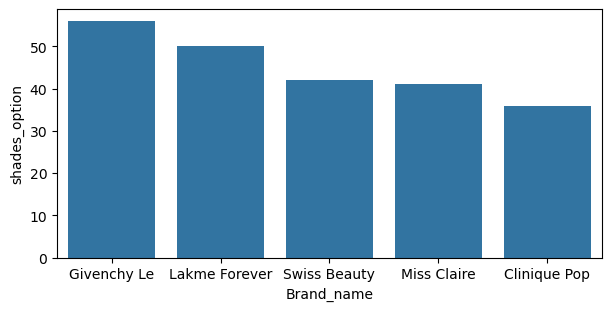

In [19]:
plt.figure(figsize=(6,3),layout="constrained")

sns.barplot(x=brand.sort_values(ascending=False).head().index,y=brand.sort_values(ascending=False).head())
plt.savefig("barplot_dp_multi.jpg")
plt.show()

#### Brand_name V/S Discount
- Paese Cosmetics, Rhe Cosmetics, and MAKEUP BY entice price-sensitive shoppers with steep discounts nearing 70%, while Love Earth and Aravi Organic offer competitive yet slightly lower deals.
- These discount strategies highlight different brand positioning in attracting budget-conscious versus value-driven consumers.

In [20]:
brand=df.groupby("Brand_name")["Discount"].max()
brand.sort_values(ascending=False).head()

Brand_name
MAKEUP BY          70.0
Rhe Cosmetics      70.0
Paese Cosmetics    70.0
Love Earth         65.0
Aravi Organic      61.0
Name: Discount, dtype: float64

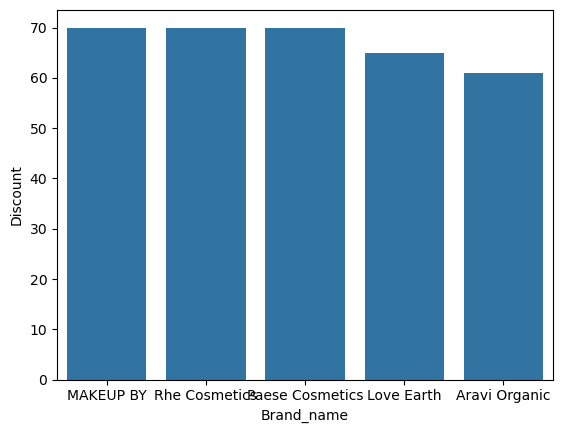

In [22]:
sns.barplot(x=brand.sort_values(ascending=False).head().index,y=brand.sort_values(ascending=False).head())
plt.show()

#### Multivariate
- The pairplot reveals clear relationships between several feature pairs, with some classes forming distinct clusters, indicating potential for good class separability. 
- Strong positive or negative correlations are visible between certain features, suggesting redundancy or complementary trends. Overlapping regions indicate areas where classification might be challenging. Overall, the visualization helps identify feature interactions and guides feature selection for modeling.

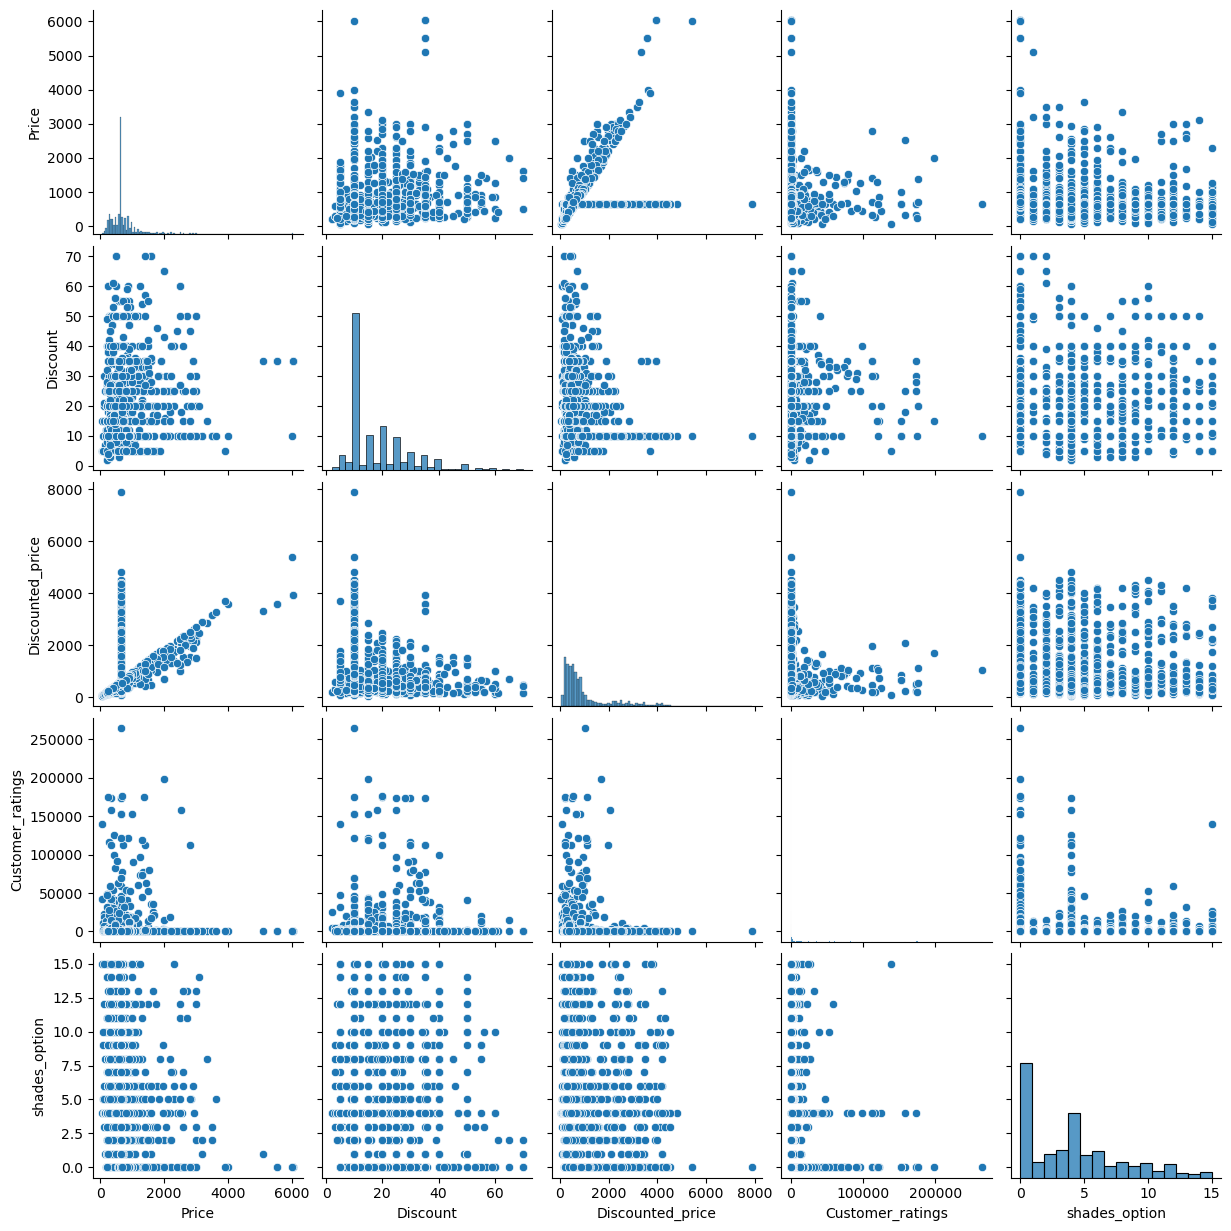

In [69]:
sns.pairplot(df.select_dtypes(include="number"))
plt.savefig("heatmap_multi.jpg")
plt.show()

#### Heatmap
- Price vs Discounted price = 0.37
Weak positive correlation.
Likely because discounted_price is calculated from the original price, so some direct relationship exists.

- Discount vs Discounted price = -0.28
Weak negative correlation.
As discounts increase, the final price (after discount) tends to drop — expected behaviour.

- Price vs Discount = 0.14
Weak positive correlation.
Suggests higher-priced items might get a slightly larger discount, but not strongly linked.

- Shades option vs Price = -0.13
Slight negative correlation.
Price is not heavily influenced by how many of shades options a product has


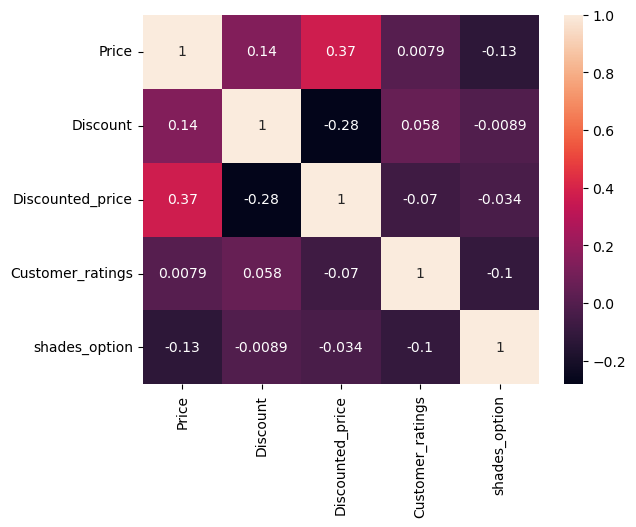

In [70]:
sns.heatmap(df.corr(numeric_only = True),annot=True)
plt.savefig("heatmap_multi.jpg")
plt.show()